# Wordclouds

## Get data

In [1]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('plot_summary_df.csv', index_col=0, converters={'plot_tokens':literal_eval})

In [2]:
df.head()

book  chapter_number            chapter_title  \
0     1               1        The Boy Who Lived   
1     1               2      The Vanishing Glass   
2     1               3  The Letters from No One   
3     1               4   The Keeper of the Keys   
4     1               5             Diagon Alley   

                                                plot  \
0  Vernon and Petunia Dursley of Number Four Priv...   
1  Dudley counting his presents Ten years pass si...   
2  Hundreds of letters arriving at the fireplace ...   
3  Rubeus Hagrid enters the cabin There is anothe...   
4  Ollivander Wand Shop When Harry wakes the next...   

                                         plot_tokens  
0  [Vernon, and, Petunia, Dursley, of, Number, Fo...  
1  [Dudley, counting, his, presents, Ten, years, ...  
2  [Hundreds, of, letters, arriving, at, the, fir...  
3  [Rubeus, Hagrid, enters, the, cabin, There, is...  
4  [Ollivander, Wand, Shop, When, Harry, wakes, t...

In [10]:
# make lower case tokens
lower_tokens = []
for index, row in df.iterrows():
    lower_tokens.append([token.lower() for token in row['plot_tokens']])
df['tokens_lower'] = lower_tokens
df.head()

book  chapter_number            chapter_title  \
0     1               1        The Boy Who Lived   
1     1               2      The Vanishing Glass   
2     1               3  The Letters from No One   
3     1               4   The Keeper of the Keys   
4     1               5             Diagon Alley   

                                                plot  \
0  Vernon and Petunia Dursley of Number Four Priv...   
1  Dudley counting his presents Ten years pass si...   
2  Hundreds of letters arriving at the fireplace ...   
3  Rubeus Hagrid enters the cabin There is anothe...   
4  Ollivander Wand Shop When Harry wakes the next...   

                                         plot_tokens  \
0  [Vernon, and, Petunia, Dursley, of, Number, Fo...   
1  [Dudley, counting, his, presents, Ten, years, ...   
2  [Hundreds, of, letters, arriving, at, the, fir...   
3  [Rubeus, Hagrid, enters, the, cabin, There, is...   
4  [Ollivander, Wand, Shop, When, Harry, wakes, t...   

                                        tokens_lower  
0  [vernon, and, petunia, dursley, of, number, fo...  
1  [dudley, counting, his, presents, ten, years, ...  
2  [hundreds, of, letters, arriving, at, the, fir...  
3  [rubeus, hagrid, enters, the, cabin, there, is...  
4  [ollivander, wand, shop, when, harry, wakes, t...

## One big series wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

full_text = " "
for index, row in df.iterrows():
    full_text += row['plot'].lower() + " "

wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(full_text)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('C:/Users/frede/OneDrive/Dokumenter/DTU/CSS_project_website/static/images/full_word_cloud.png')
plt.show()

## TF-IDF wordclouds per book

Create several large documents, one for each book, including all tokens from the plot summaries of that book.

In [12]:
import nltk
# make dict with tokens as list
docs = {i: {'tokens':[]} for i in range(1,8)}
for index, row in df.iterrows():
    docs[row['book']]['tokens'].extend(row['tokens_lower'])
# make each list into a nltk Text
for book in docs.keys():
    docs[book]['text'] = nltk.Text(docs[book]['tokens']) 
    
# access book 1 tokens a docs[1]['tokens'] and book 1 nltk text as docs[1]['text']

compute TF, IDF and TF-IDF for all tokens in each book

In [13]:
import numpy as np
from collections import Counter
# for each book
# make set of unique words
# compute TF for all unique words
# compute IDF for all unique words

for book in docs.keys():
    doc = docs[book]['text']
    fdist = nltk.FreqDist(doc)
    docs[book]['unique_words'] = [tup for tup in fdist]
    docs[book]['TF'] = [fdist[word]/len(doc) for word in docs[book]['unique_words']]
    docs[book]['TF counter'] = Counter({word: docs[book]['TF'][i] for i, word in enumerate(docs[book]['unique_words'])})
    
# how many of the documents are each word in?
cumulative_unique = [] 
for book in docs.keys():
    cumulative_unique.extend(docs[book]['unique_words'])
cumulative_unique = nltk.Text(cumulative_unique)
fdist_allwords = nltk.FreqDist(cumulative_unique)

# IDF
N = 7
for book in docs.keys():
    docs[book]['IDF'] = [np.log10(N/fdist_allwords[word]) for word in docs[book]['unique_words']]
    docs[book]['TF-IDF'] = [docs[book]['TF'][i]*docs[book]['IDF'][i] for i in range(len(docs[book]['unique_words']))]
    docs[book]['TF-IDF counter'] = Counter({word: docs[book]['TF-IDF'][i] for i, word in enumerate(docs[book]['unique_words'])})

Find and tabulate top 10 terms for TF and TF-IDF

In [14]:
from tabulate import tabulate
# top 10 TF
tableTF = [['Rank']]
for book in docs.keys():
    tableTF[0].append(book)
    tableTF[0].append(book)
    
for i in range(10):
    tableTF.append([i+1])
    for book in docs.keys():
        tup = docs[book]['TF counter'].most_common()[i]
        tableTF[i+1].append(round(tup[1],4))
        tableTF[i+1].append(tup[0])

print(tabulate(tableTF,headers="firstrow"))

  Rank       1  1           2  2           3  3           4  4           5  5           6  6           7  7
------  ------  -----  ------  -----  ------  -----  ------  -----  ------  -----  ------  -----  ------  -----
     1  0.0612  the    0.0602  the    0.0624  the    0.0617  the    0.0567  the    0.0529  the    0.0595  the
     2  0.0377  and    0.0375  to     0.0378  to     0.0381  to     0.0374  to     0.037   to     0.0372  to
     3  0.0367  to     0.0338  and    0.032   and    0.0305  and    0.032   and    0.0368  and    0.0371  and
     4  0.0315  harry  0.026   harry  0.0257  harry  0.0236  harry  0.0291  harry  0.0281  harry  0.0279  harry
     5  0.0229  a      0.0203  that   0.0199  a      0.0202  a      0.0184  of     0.0193  a      0.0174  he
     6  0.0197  he     0.0189  a      0.0176  he     0.0189  that   0.0175  that   0.0183  of     0.0165  of
     7  0.0172  that   0.017   of     0.0174  that   0.0153  of     0.0167  is     0.0179  his    0.0163  a
     8  0.016

In [15]:
# top 10 TF-IDF
tableTFIDF = [['Rank']]
for book in docs.keys():
    tableTFIDF[0].append(book)
    tableTFIDF[0].append(book)
    
for i in range(10):
    tableTFIDF.append([i+1])
    for book in docs.keys():
        tup = docs[book]['TF-IDF counter'].most_common()[i]
        tableTFIDF[i+1].append(round(tup[1],4))
        tableTFIDF[i+1].append(tup[0])

print(tabulate(tableTFIDF,headers="firstrow"))

  Rank       1  1               2  2               3  3                 4  4                5  5                6  6              7  7
------  ------  ---------  ------  ---------  ------  -----------  ------  ----------  ------  ----------  ------  --------  ------  ---------
     1  0.0013  quirrell   0.002   lockhart   0.0014  pettigrew    0.0032  crouch      0.0032  umbridge    0.0027  slughorn  0.0018  sword
     2  0.0009  piers      0.0018  chamber    0.0014  buckbeak     0.0018  moody       0.0005  courtroom   0.0015  felix     0.0016  horcrux
     3  0.0008  troll      0.0014  diary      0.0013  lupin        0.0013  bagman      0.0005  wizengamot  0.0015  felicis   0.0011  griphook
     4  0.0006  headed     0.0013  petrified  0.0011  scabbers     0.0013  winky       0.0005  angelina    0.0015  morfin    0.001   aberforth
     5  0.0006  fluffy     0.0012  heir       0.0009  dementors    0.0011  tournament  0.0005  grawp       0.0012  merope    0.0009  ariana
     6  0.0005  m

wordcloud

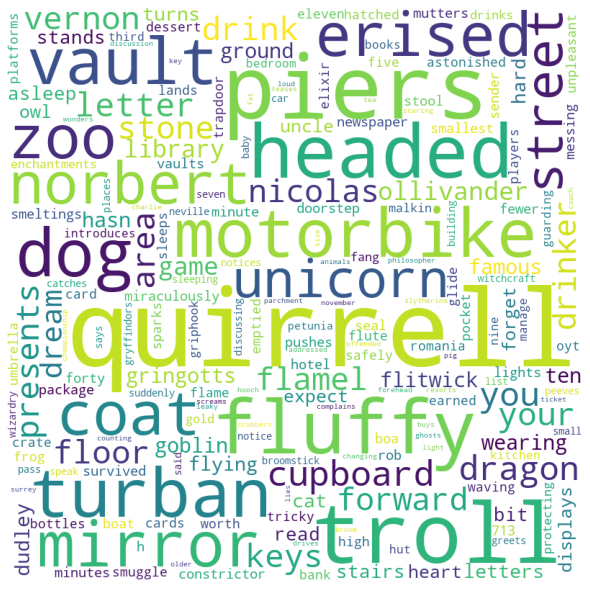

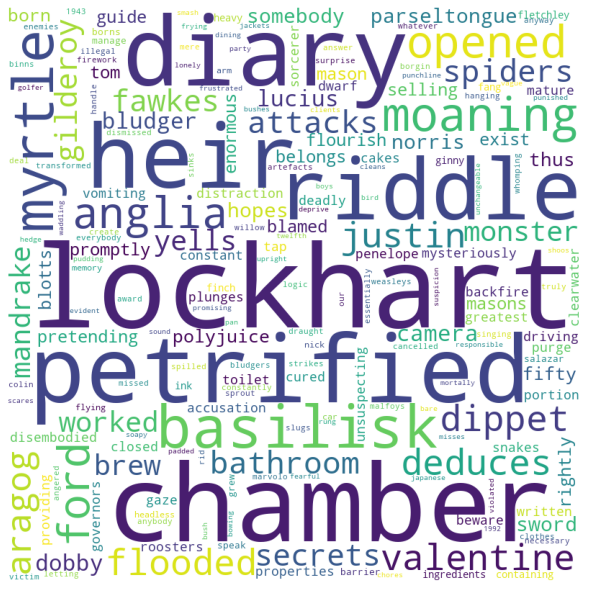

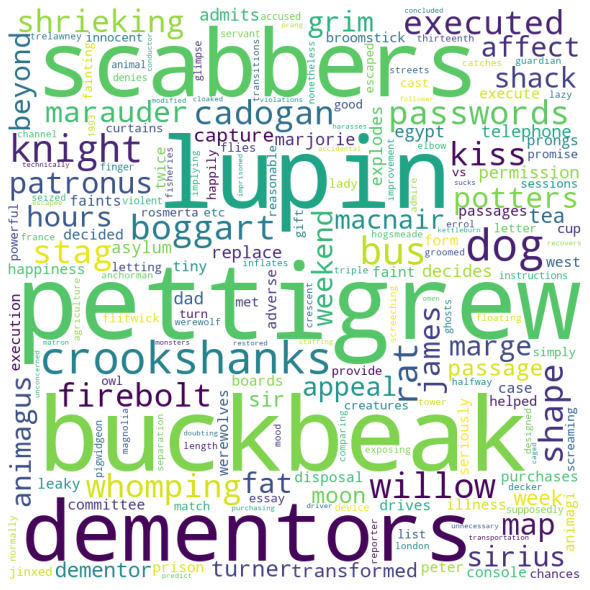

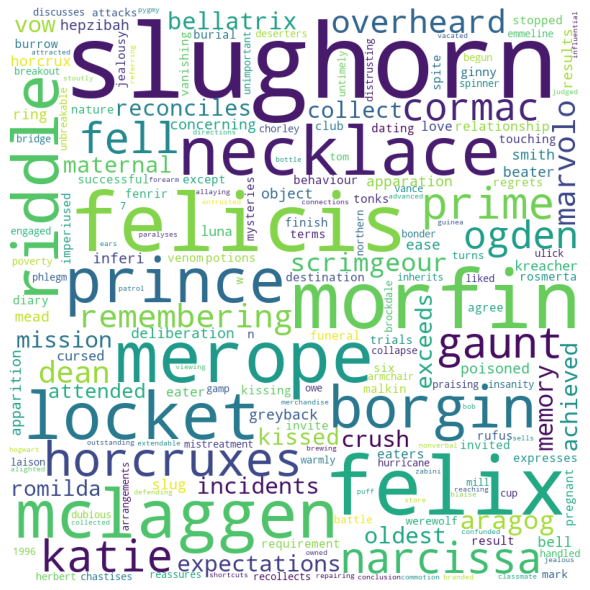

In [22]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
# create a wordcloud per book based on TF-IDF
for book in docs.keys():
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate_from_frequencies(docs[book]['TF-IDF counter'])

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    path_end = f"{book}.png"
    path = 'C:/Users/frede/OneDrive/Dokumenter/DTU/CSS_project_website/static/images/wordcloud_book_' + path_end
    plt.savefig(path)
    plt.show()